In [35]:
import pandas as pd
import json
from matplotlib import pyplot as plt
import numpy as np

In [36]:
dir = './FLAN-T5-xl_eval/'

with open(dir+'origin_results.json', 'r') as f:
    results_original_set = json.load(f)


with open(dir+'contrast_results.json', 'r') as f:
    results_contrast_set = json.load(f)


In [37]:
performance_original = []
performance_contrast = []

for shot, report in results_original_set.items():
    performance_original.append(dict(shot=shot, accuracy=report["accuracy"]))

for shot, report in results_contrast_set.items():
    performance_contrast.append(dict(shot=shot, accuracy=report["accuracy"]))

In [38]:
total = []
indexes = []
original_result = [performance_original[x]['accuracy'] for x in range(len(performance_original))]
contrast_result = [performance_contrast[x]['accuracy'] for x in range(len(performance_contrast))]
shots_list = [str(x)+' Shots' for x in [y['shot'] for y in performance_contrast]]

for i in range(len(original_result)):
    total.append(original_result[i])
    total.append(contrast_result[i])
    indexes.append(shots_list[i])
    indexes.append(shots_list[i]+' C')

print(total)
print(indexes)

[0.5102459016393442, 0.5163934426229508, 0.8852459016393442, 0.8442622950819673, 0.8975409836065574, 0.8463114754098361, 0.9077868852459017, 0.8872950819672131]
['0 Shots', '0 Shots C', '1 Shots', '1 Shots C', '3 Shots', '3 Shots C', '5 Shots', '5 Shots C']


In [ ]:
# Compute the mean drop of performance
print(total)
original = total[::2]
contrast = total[1::2]
total_2 = zip(original, contrast)

pct_list = []

for original_elem, contrast_elem in total_2:
    pct_diff = original_elem/contrast_elem
    pct_list.append(1-pct_diff)

print(np.min(pct_list))

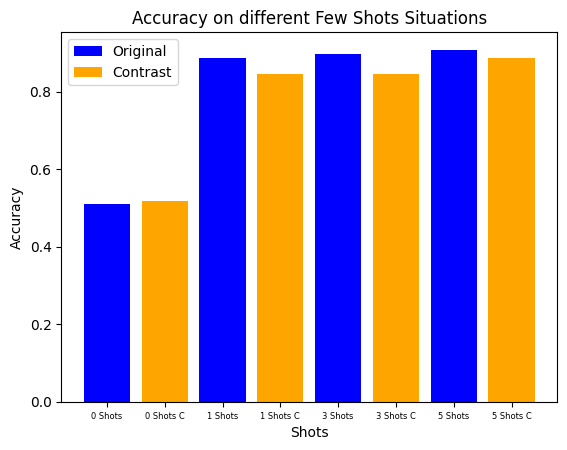

In [40]:
plt.bar([i for i in range(len(indexes)) if i % 2 == 0], [total[i] for i in range(len(indexes)) if i % 2 == 0], color='blue', label='Original')
plt.bar([i for i in range(len(indexes)) if i % 2 != 0], [total[i] for i in range(len(indexes)) if i % 2 != 0], color='orange', label='Contrast')
plt.xticks(ticks = [i for i in range(len(indexes))], labels=[indexes[i] for i in range(len(indexes))], fontsize=6)

plt.ylabel('Accuracy')
plt.xlabel('Shots')

plt.title('Accuracy on different Few Shots Situations')
plt.legend()
plt.show()